In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import date, time, datetime, timedelta 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import shap
# link: https://shap.readthedocs.io/en/latest/
import lime
# link: https://github.com/marcotcr/lime

D:\Anaconda\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data=pd.read_csv('house_data.csv')

In [ ]:
#data source: kaggle (https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

### Data visualization and preparation

In [3]:
data.head(50)

id             date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  20141013T000000   221900.0         3       1.00         1180   
1   6414100192  20141209T000000   538000.0         3       2.25         2570   
2   5631500400  20150225T000000   180000.0         2       1.00          770   
3   2487200875  20141209T000000   604000.0         4       3.00         1960   
4   1954400510  20150218T000000   510000.0         3       2.00         1680   
5   7237550310  20140512T000000  1225000.0         4       4.50         5420   
6   1321400060  20140627T000000   257500.0         3       2.25         1715   
7   2008000270  20150115T000000   291850.0         3       1.50         1060   
8   2414600126  20150415T000000   229500.0         3       1.00         1780   
9   3793500160  20150312T000000   323000.0         3       2.50         1890   
10  1736800520  20150403T000000   662500.0         3       2.50         3560   
11  9212900260  20140527T000000   468000.0         2       1.00         1160   
12   114101516  20140528T000000   310000.0         3       1.00         1430   
13  6054650070  20141007T000000   400000.0         3       1.75         1370   
14  1175000570  20150312T000000   530000.0         5       2.00         1810   
15  9297300055  20150124T000000   650000.0         4       3.00         2950   
16  1875500060  20140731T000000   395000.0         3       2.00         1890   
17  6865200140  20140529T000000   485000.0         4       1.00         1600   
18    16000397  20141205T000000   189000.0         2       1.00         1200   
19  7983200060  20150424T000000   230000.0         3       1.00         1250   
20  6300500875  20140514T000000   385000.0         4       1.75         1620   
21  2524049179  20140826T000000  2000000.0         3       2.75         3050   
22  7137970340  20140703T000000   285000.0         5       2.50         2270   
23  8091400200  20140516T000000   252700.0         2       1.50         1070   
24  3814700200  20141120T000000   329000.0         3       2.25         2450   
25  1202000200  20141103T000000   233000.0         3       2.00         1710   
26  1794500383  20140626T000000   937000.0         3       1.75         2450   
27  3303700376  20141201T000000   667000.0         3       1.00         1400   
28  5101402488  20140624T000000   438000.0         3       1.75         1520   
29  1873100390  20150302T000000   719000.0         4       2.50         2570   
30  8562750320  20141110T000000   580500.0         3       2.50         2320   
31  2426039314  20141201T000000   280000.0         2       1.50         1190   
32   461000390  20140624T000000   687500.0         4       1.75         2330   
33  7589200193  20141110T000000   535000.0         3       1.00         1090   
34  7955080270  20141203T000000   322500.0         4       2.75         2060   
35  9547205180  20140613T000000   696000.0         3       2.50         2300   
36  9435300030  20140528T000000   550000.0         4       1.00         1660   
37  2768000400  20141230T000000   640000.0         4       2.00         2360   
38  7895500070  20150213T000000   240000.0         4       1.00         1220   
39  2078500320  20140620T000000   605000.0         4       2.50         2620   
40  5547700270  20140715T000000   625000.0         4       2.50         2570   
41  7766200013  20140811T000000   775000.0         4       2.25         4220   
42  7203220400  20140707T000000   861990.0         5       2.75         3595   
43  9270200160  20141028T000000   685000.0         3       1.00         1570   
44  1432701230  20140729T000000   309000.0         3       1.00         1280   
45  8035350320  20140718T000000   488000.0         3       2.50         3160   
46  8945200830  20150325T000000   210490.0         3       1.00          990   
47  4178300310  20140716T000000   785000.0         4       2.50         2290   
48  9215400105  20150428T000000   450000.0         3       1.75         1250   
49   8220390

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

data looks clean, no null values 

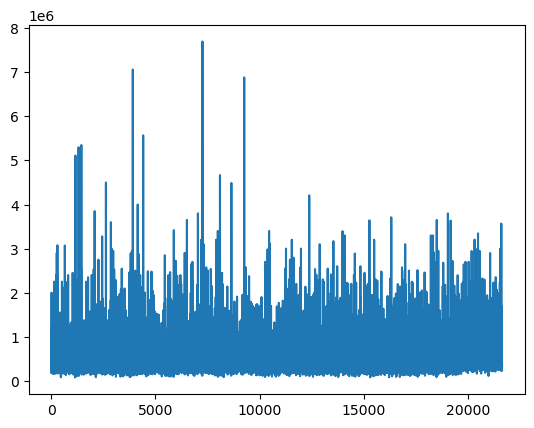

In [5]:
plt.plot(data['price'])

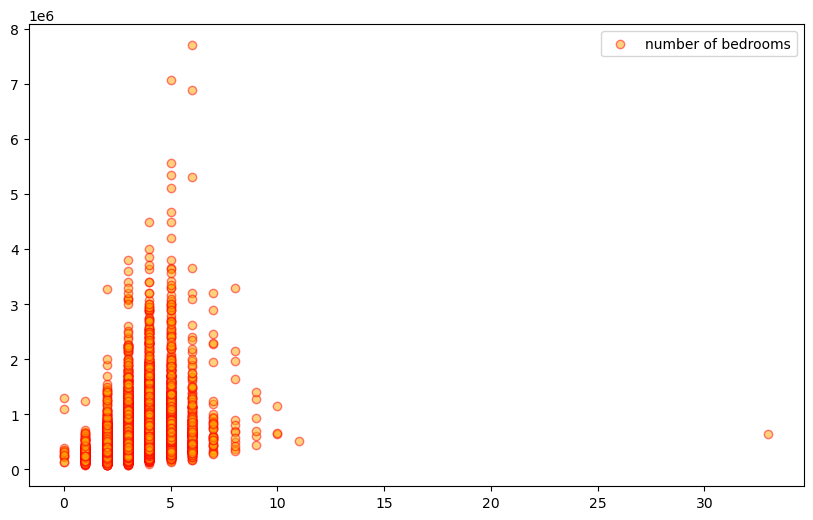

In [6]:
bedrooms,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax.scatter(data['bedrooms'], data['price']  ,color='orange', label="number of bedrooms",edgecolor='red', alpha=0.5)

plt.legend()
plt.show()

In [7]:
data.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

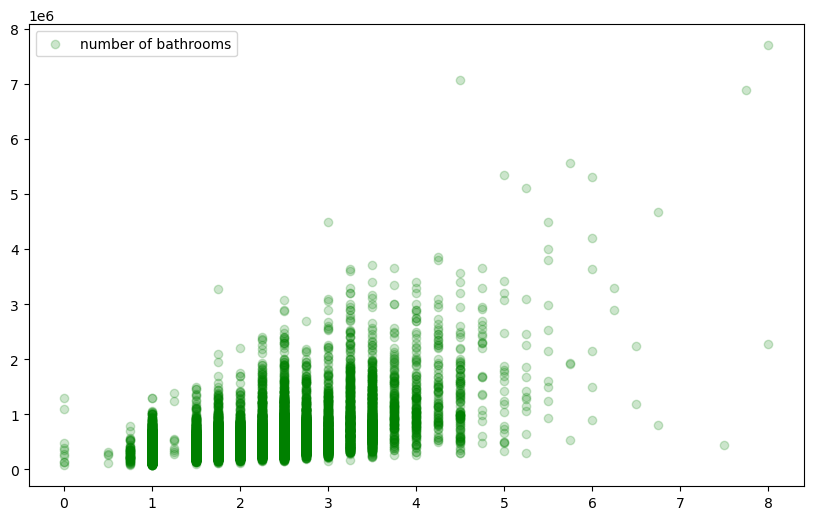

In [8]:
bathrooms,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax.scatter(data['bathrooms'], data['price']  ,color='green', label="number of bathrooms", edgecolor='green', alpha=0.2)

plt.legend()
plt.show()

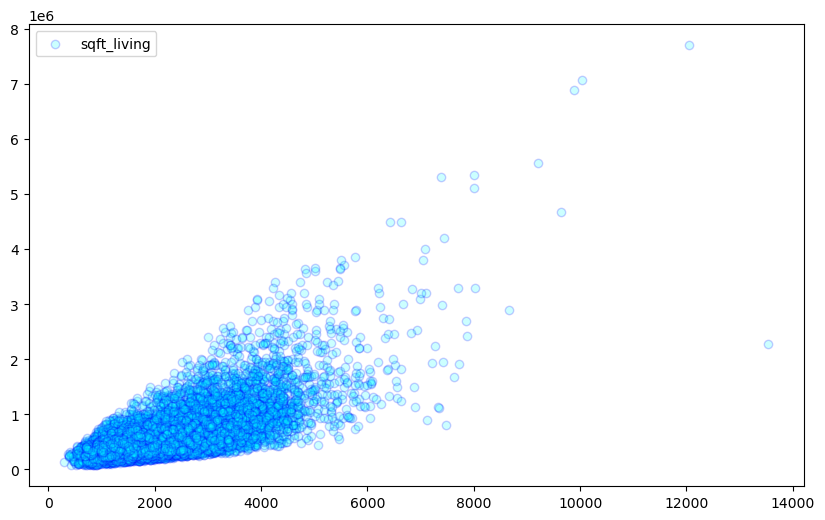

In [9]:
sqft_living,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax.scatter(data['sqft_living'], data['price']  ,color='cyan', label="sqft_living", edgecolor="blue", alpha=0.2)

plt.legend()
plt.show()

In [10]:
data["sqft_living"].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

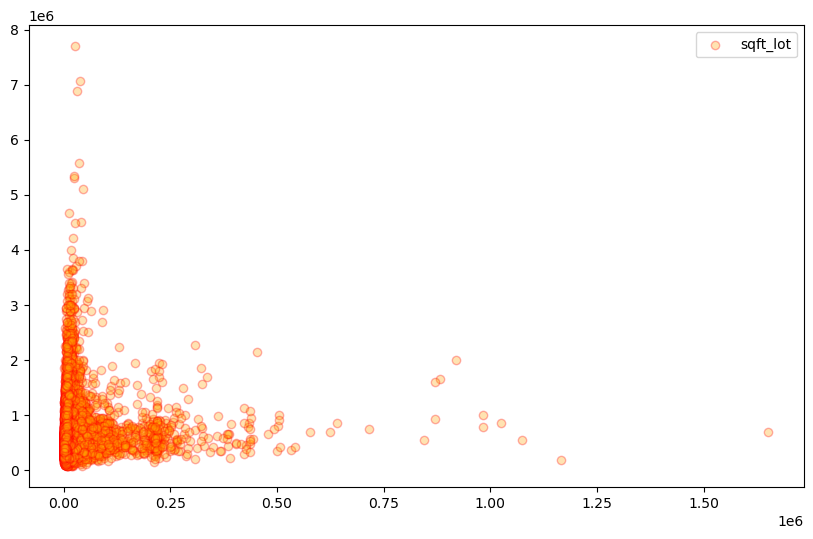

In [11]:
sqft_lot,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax.scatter(data['sqft_lot'], data['price']  ,color='orange', label="sqft_lot",edgecolor='red', alpha=0.3)

plt.legend()
plt.show()

In [12]:
data['sqft_lot'].describe()

count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

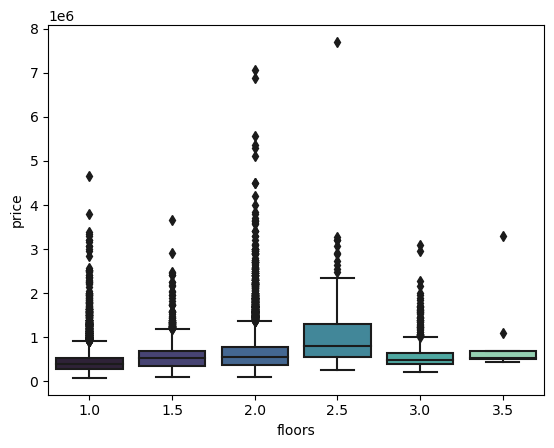

In [13]:
sns.boxplot(x=data['floors'], y=data['price'], palette="mako")
plt.show()

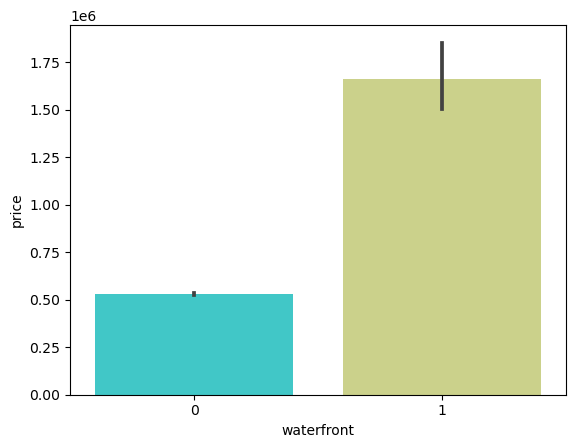

In [14]:
sns.barplot(x=data['waterfront'], y=data['price'], palette='rainbow')
plt.show()

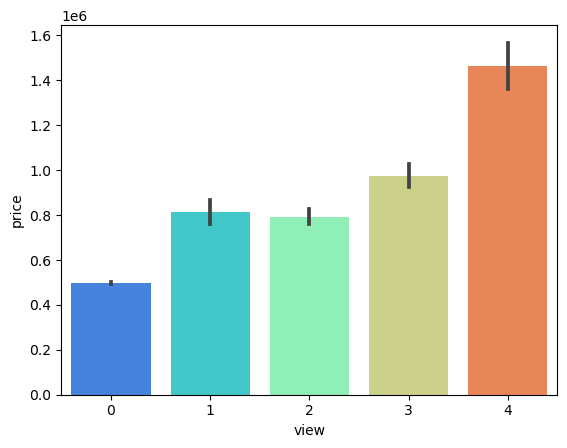

In [15]:
sns.barplot(x=data['view'], y=data['price'], palette='rainbow')
plt.show()

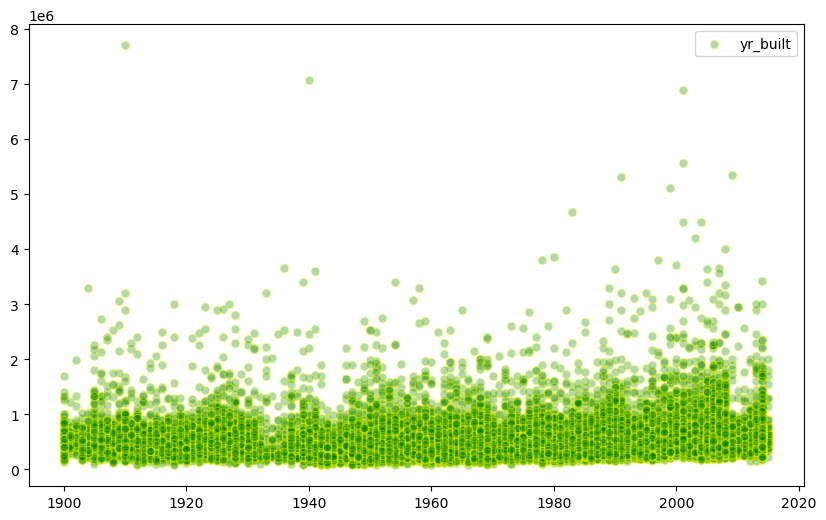

In [16]:
yr_built,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax.scatter(data['yr_built'], data['price']  ,color='green', label="yr_built", edgecolor='yellow', alpha=0.3)

plt.legend()
plt.show()

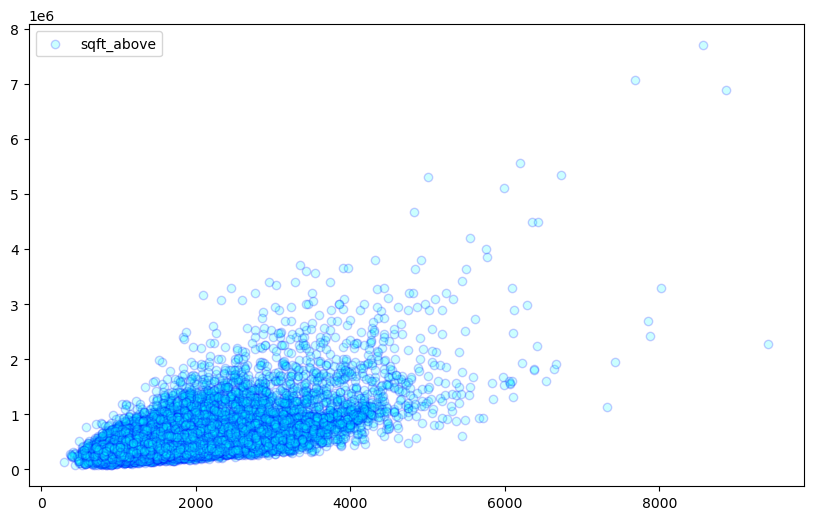

In [17]:
sqft_above,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax.scatter(data['sqft_above'], data['price']  ,color='cyan', label="sqft_above",edgecolor='blue', alpha=0.2)

plt.legend()
plt.show()

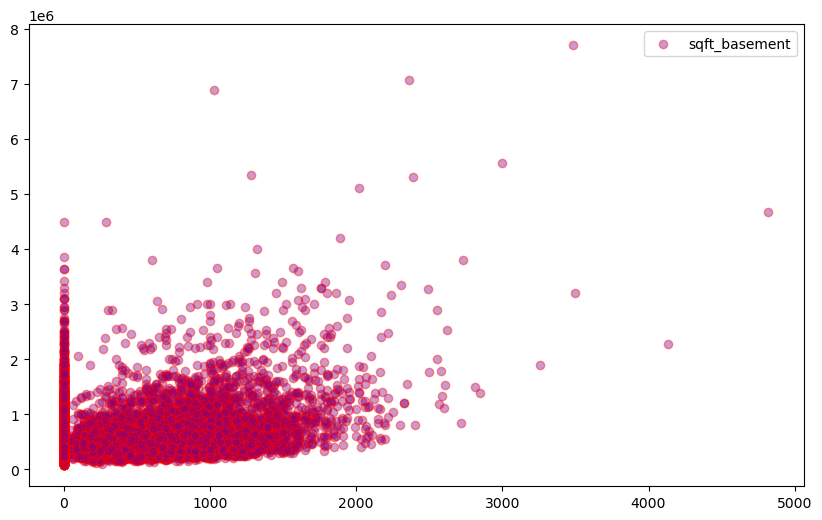

In [18]:
sqft_basement,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax.scatter(data['sqft_basement'], data['price']  ,color='purple', label="sqft_basement", edgecolor='red', alpha=0.4)

plt.legend()
plt.show()

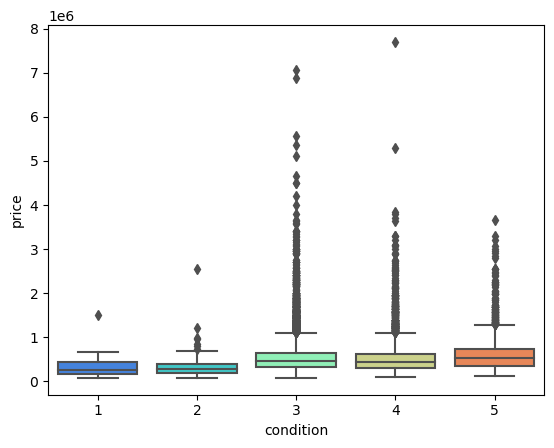

In [19]:
sns.boxplot(x=data['condition'], y=data['price'], palette="rainbow")
plt.show()


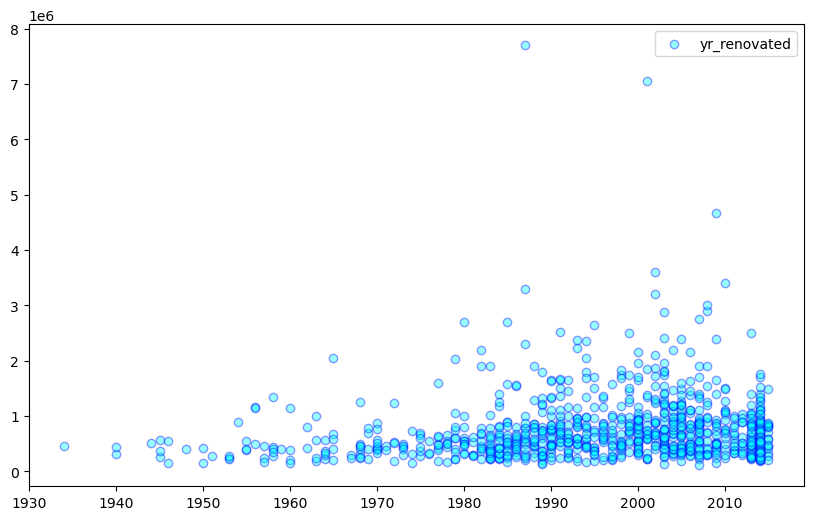

In [20]:
yr_renovated,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

test=data.loc[data['yr_renovated']>0]

ax.scatter(test['yr_renovated'], test['price']  , color='cyan', label="yr_renovated", edgecolor='blue', alpha=0.4)

plt.legend()
plt.show()


In [21]:
data['date']=pd.to_datetime(data['date'])

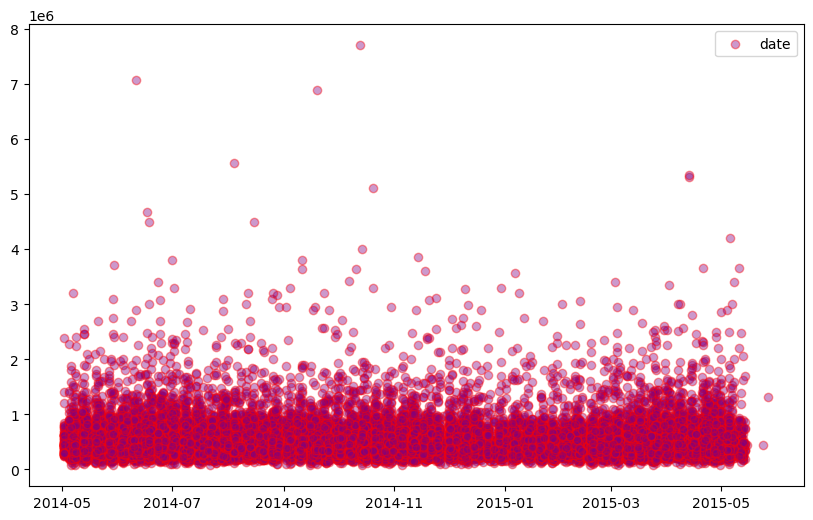

In [22]:
date,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax.scatter(data['date'], data['price']  ,color='purple', label="date", edgecolor='red', alpha=0.4)

plt.legend()
plt.show()

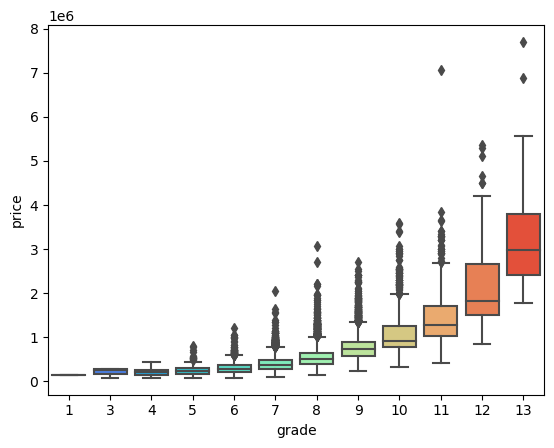

In [23]:
sns.boxplot(x=data['grade'], y=data['price'], palette="rainbow")
plt.show()

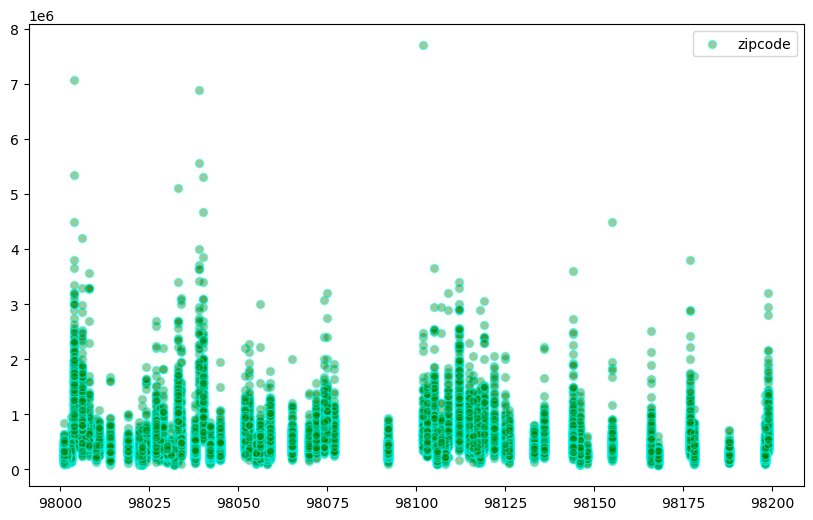

In [24]:
zipcode,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax.scatter(data['zipcode'], data['price']  ,color='green', label="zipcode", edgecolor='cyan', alpha=0.4)

plt.legend()
plt.show()

In [25]:
data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

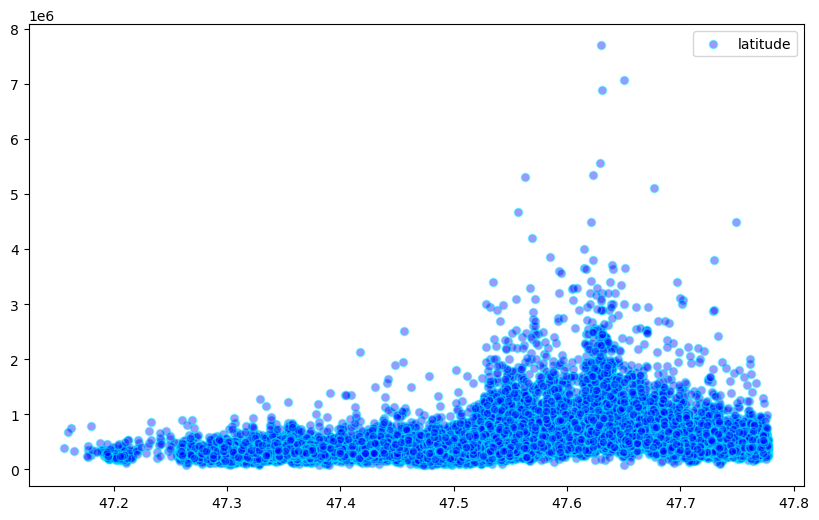

In [26]:
latitude,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax.scatter(data['lat'], data['price']  ,color='blue', label="latitude", edgecolor='cyan', alpha=0.4)

plt.legend()
plt.show()

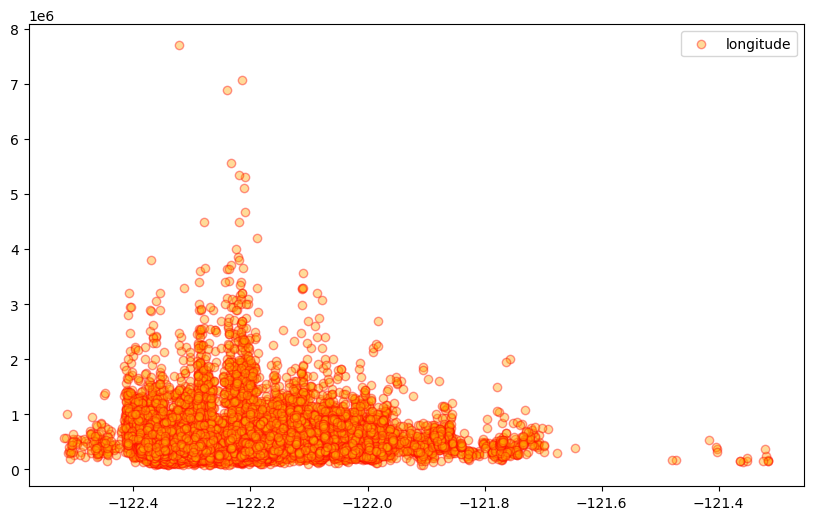

In [27]:
longitude,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax.scatter(data['long'], data['price']  ,color='orange', label="longitude", edgecolor='red', alpha=0.4)

plt.legend()
plt.show()

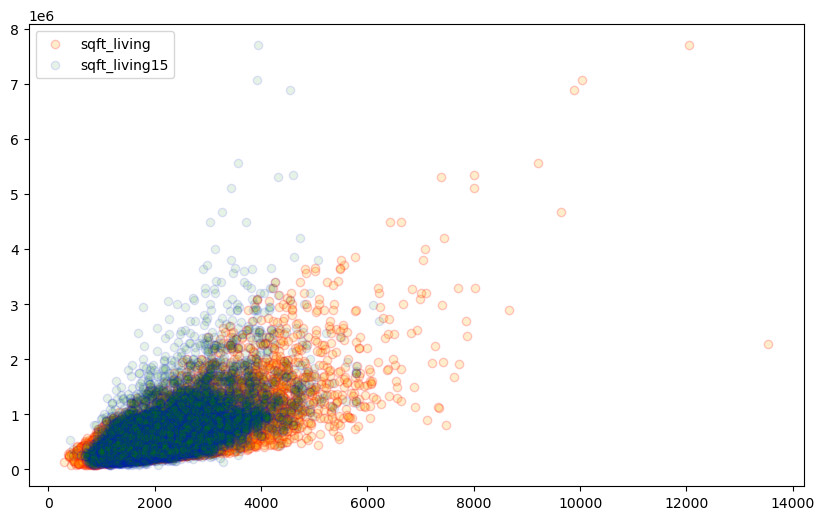

In [28]:
sqft,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax.scatter(data['sqft_living'], data['price']  ,color='orange', label="sqft_living",edgecolor='red', alpha=0.2)
ax.scatter(data['sqft_living15'], data['price'], color='green',edgecolor="blue", label='sqft_living15', alpha=0.1)
plt.legend()
plt.show()

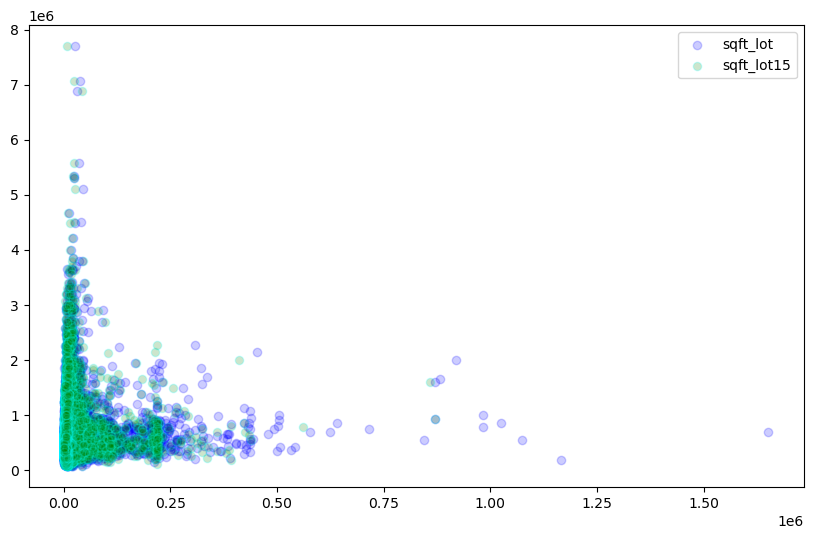

In [29]:
sqft_lot,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

ax.scatter(data['sqft_lot'], data['price']  ,color='blue', label="sqft_lot", alpha=0.2)
ax.scatter(data['sqft_lot15'], data['price'], color='green', label='sqft_lot15',edgecolor='cyan', alpha=0.2)
plt.legend()
plt.show()

In [30]:
data=data.loc[data['bedrooms']<30]

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21612 non-null  int64         
 1   date           21612 non-null  datetime64[ns]
 2   price          21612 non-null  float64       
 3   bedrooms       21612 non-null  int64         
 4   bathrooms      21612 non-null  float64       
 5   sqft_living    21612 non-null  int64         
 6   sqft_lot       21612 non-null  int64         
 7   floors         21612 non-null  float64       
 8   waterfront     21612 non-null  int64         
 9   view           21612 non-null  int64         
 10  condition      21612 non-null  int64         
 11  grade          21612 non-null  int64         
 12  sqft_above     21612 non-null  int64         
 13  sqft_basement  21612 non-null  int64         
 14  yr_built       21612 non-null  int64         
 15  yr_renovated   2161

In [32]:
data.drop(['id', 'date'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21612 non-null  float64
 1   bedrooms       21612 non-null  int64  
 2   bathrooms      21612 non-null  float64
 3   sqft_living    21612 non-null  int64  
 4   sqft_lot       21612 non-null  int64  
 5   floors         21612 non-null  float64
 6   waterfront     21612 non-null  int64  
 7   view           21612 non-null  int64  
 8   condition      21612 non-null  int64  
 9   grade          21612 non-null  int64  
 10  sqft_above     21612 non-null  int64  
 11  sqft_basement  21612 non-null  int64  
 12  yr_built       21612 non-null  int64  
 13  yr_renovated   21612 non-null  int64  
 14  zipcode        21612 non-null  int64  
 15  lat            21612 non-null  float64
 16  long           21612 non-null  float64
 17  sqft_living15  21612 non-null  int64  
 18  sqft_l

In [33]:
mean_price=data['price'].mean()
print(data['price'].std())

367135.06126862235


In [34]:
#spliting into dependent and independet variables for three different models
y=data[['price']]
x=data.drop(['price'], axis=1)

x10=x[['lat', 'waterfront', 'grade', 'long', 'view', 'bathrooms', 'bedrooms','condition', 'sqft_living', 'yr_built']]
x5=x[['lat', 'waterfront', 'grade', 'long', 'view']]

In [35]:
#normalizing data. Omittion of one-hot-encoding for categorical data like zip code, 
#to avoide additional computation time
scaler1= preprocessing.MinMaxScaler()
scaler2= preprocessing.MinMaxScaler()
normalized_data1=scaler1.fit_transform(x)
normalized_data2=scaler2.fit_transform(y)

normalized_data10=scaler1.fit_transform(x10)
normalized_data5=scaler1.fit_transform(x5)

x_data= pd.DataFrame(normalized_data1, columns=["bedrooms","bathromms", "sqft_living","sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", 
                                                   "sqft_basement","yr_built", "yr_renovated", "zipcode","lat","long","spft_living15", "sqft_lot15"])
y_data= pd.DataFrame(normalized_data2, columns=["price"])

x_data10= pd.DataFrame(normalized_data10, columns=['lat', 'waterfront', 'grade', 'long', 'view', 'bathrooms', 'bedrooms','condition', 'sqft_living', 'yr_built'])

x_data5= pd.DataFrame(normalized_data5, columns=['lat', 'waterfront', 'grade', 'long', 'view'])


### Split data into training and test data

In [36]:
from sklearn.model_selection import train_test_split

#split data into train and test data for threee different models
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
    test_size=0.2, shuffle = True, random_state = 1)

x_train10, x_test10, y_train10, y_test10 = train_test_split(x_data10, y_data,
    test_size=0.2, shuffle = True, random_state = 1)

x_train5, x_test5, y_train5, y_test5 = train_test_split(x_data5, y_data,
    test_size=0.2, shuffle = True, random_state = 1)

In [37]:
#default 100 trees
RFR=RandomForestRegressor(random_state=1) 

In [38]:
#default 100 trees
RFR_10=RandomForestRegressor(random_state=1)

In [39]:
#default 100 trees
RFR_5=RandomForestRegressor(random_state=1)

# Training RF

In [40]:
RFR_model=RFR.fit(x_train.values, y_train.values.ravel())
RFR_model10=RFR_10.fit(x_train10.values, y_train.values.ravel())
RFR_model5=RFR_5.fit(x_train5.values, y_train.values.ravel())

In [41]:
#Training three random forests with 5,10 and 18 features
pred_RFR=RFR_model.predict(x_test.values)
pred_RFR10=RFR_model10.predict(x_test10.values)
pred_RFR5=RFR_model5.predict(x_test5.values)

#Evaluation through R2 score
print(metrics.r2_score(y_test,pred_RFR))
print(metrics.r2_score(y_test,pred_RFR10))
print(metrics.r2_score(y_test,pred_RFR5))

0.8631044684936686
0.8571904440543485
0.781393437612009


# Exploring SHAP and LIME

In [42]:
explainer = shap.KernelExplainer(RFR_model.predict, x_train.iloc[:100])
shap_values = explainer.shap_values(x_test.iloc[8])

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_test.iloc[8])

In [43]:
shap_values.sum()

0.01439278906885244

In [44]:
lime_explainer=lime.lime_tabular.LimeTabularExplainer(x_train.values[:100],feature_names = x_train.columns, mode='regression')
surrogate_model = lime_explainer.explain_instance(x_train.iloc[20],RFR_model.predict, num_features=18)

surrogate_model.show_in_notebook(show_table=True, show_all=False)

# Programming Shapley value estimation

In [45]:
def Monte_carlo_sampling(m, instance, n, model): 
    shapley_estimations=np.zeros(n)
    p_arr=np.arange(0,n)
    #for all features
    for i in range(0,n):
        # over all iterations
        for p in range(0, m):
            #draw a new instance z
            z=x_train.sample(1).values.ravel()
            #generate a random permutation
            np.random.shuffle(p_arr)
            #construct to new instances
            x_i=np.zeros(n)
            x=np.zeros(n)
            schalter=False
            # new data points are constructed, by first getting a random order from the index array (p_arr)
            # By iterating through the index array (p_arr), values before p_arr[j]==i receive
            # the value of z with index p_arr[j]. After that, the remaining values  
            # are filled wit values from the original instance. Through this mapping we get the same sample
            # as in the proposed algorithm but preserve the order of the features 
            for j in range(0,n):
                if schalter==False:
                    if p_arr[j]==i:
                        schalter=True
                        x_i[p_arr[j]]=instance[p_arr[j]]
                        x[p_arr[j]]=z[p_arr[j]]
                    else:
                        x_i[p_arr[j]]=z[p_arr[j]]
                        x[p_arr[j]]=z[p_arr[j]]
                else:
                    x_i[p_arr[j]]=instance[p_arr[j]]
                    x[p_arr[j]]=instance[p_arr[j]]
            #get marginal contribution
            mg= model.predict(x_i.reshape(1,-1))-model.predict(x.reshape(1,-1))

            shapley_estimations[i]= shapley_estimations[i]+ mg[0]
        # compute shapley value of feature i
        shapley_estimations[i] = shapley_estimations[i]/m
    # return shapley values for all features
    return shapley_estimations  

# Comparing shapley values between Shapley value estimation and SHAP

In [46]:
p=Monte_carlo_sampling(500,  x_test5.iloc[8].values.ravel(), 5, RFR_model5)

print(p)

[ 0.0234658  -0.0003413   0.01641546 -0.0118077  -0.0023417 ]


In [47]:
explainer5 = shap.KernelExplainer(RFR_model5.predict, x_train5.iloc[:100])
shap_values = explainer5.shap_values(x_test5.iloc[8])

shap.initjs()
shap.force_plot(explainer5.expected_value, shap_values, x_test5.iloc[8])

In [48]:
print(shap_values)

[ 0.01706431 -0.00016891 -0.01319851  0.00263395 -0.00065038]


In [49]:

sample_idx = 0
x = x_test5.iloc[8]

In [50]:
#Implementation by Tobias Sterbak (https://www.depends-on-the-definition.com/shapley-values-from-scratch/)
M = 500
shapley_estimations2=np.zeros(5)
n_features = len(x)
for j in range(0, 5):
    feature_idxs = list(range(n_features))
    feature_idxs.remove(j)
    marginal_contributions = []
    for _ in range(M):
        z = x_train.sample(1).values[0]
        x_idx = random.sample(feature_idxs, min(max(int(0.2*n_features), random.choice(feature_idxs)), int(0.8*n_features)))
        #print(x_idx)
        z_idx = [idx for idx in feature_idxs if idx not in x_idx]
    
        # construct two new instances
        x_plus_j = np.array([x[i] if i in x_idx + [j] else z[i] for i in range(n_features)])
        x_minus_j = np.array([z[i] if i in z_idx + [j] else x[i] for i in range(n_features)])
    
        # calculate marginal contribution
        marginal_contribution = RFR_model5.predict(x_plus_j.reshape(1, -1)) - RFR_model5.predict(x_minus_j.reshape(1, -1))
        marginal_contributions.append(marginal_contribution)
    #print(shapley_estimations)
    shapley_estimations2[j] = sum(marginal_contributions) / len(marginal_contributions)  # our shaply value
print(shapley_estimations2)


[ 0.02819484 -0.0002454   0.01712089 -0.01205199 -0.00342549]


In [51]:
#average prediction of the model
RFR_model5.predict(x_test5.values).mean()

0.061074631320922446

In [52]:
#preditcion of the model for the particular instance
RFR_model5.predict(x_test5.iloc[8].values.reshape(1, -1))

array([0.06264656])

In [53]:
#sum of the Shapley values from the Monte Carlo Sampling
sum (p)

0.02539055673879786

It should be noticed, that the KernelExplainer and implemented version of the Shapley value estimation deliver different Shapley values. The implemented version has been compared with an implementation from the internet but yielded similar results as the used implementation. This reduces the propability of a programming error. Maybe, a significantly higher number of iterations would provide other results. However, the Shapley values of the KernelExplainer can be considered more reliable based on the average prediction of the model on the data set and on the prediction of the instance. The estimation of the Shapley value estimation does not add up to the difference between the average prediction and the model prediction for the instance.

In [54]:
p2=Monte_carlo_sampling(200,  x_test5.iloc[1].values.ravel(), 5, RFR_model5)

print(p2)

[ 0.070908   -0.00035139  0.07805041  0.00376514 -0.00339585]


In [55]:
sum(p2)

0.14897632232349747

In [56]:
explainer5 = shap.KernelExplainer(RFR_model5.predict, x_train5.iloc[:100])
shap_values = explainer5.shap_values(x_test5.iloc[1])

shap.initjs()
shap.force_plot(explainer5.expected_value, shap_values, x_test5.iloc[1])

In [57]:
print(shap_values)

[ 0.02761668 -0.00048206  0.06399841  0.02416627 -0.00139543]


In [59]:
p3=Monte_carlo_sampling(200,  x_test5.iloc[15].values.ravel(), 5, RFR_model5)

print(p3)


[ 0.05153373 -0.00071345  0.05424432 -0.00333548  0.02047059]


In [60]:
sum(p3)

0.12219971282622955

In [61]:
explainer5 = shap.KernelExplainer(RFR_model5.predict, x_train5.iloc[:100])
shap_values = explainer5.shap_values(x_test5.iloc[1])

shap.initjs()
shap.force_plot(explainer5.expected_value, shap_values, x_test5.iloc[1])

In [62]:
print(shap_values)

[ 0.02761668 -0.00048206  0.06399841  0.02416627 -0.00139543]


# Comparing runtime between all methods

In [63]:
from timeit import default_timer as timer

# Time experiment for model using 5 features

In [64]:
average_time5= [[0, 0, 0]]

In [65]:


def time_shap():
    for i in range(0,5):
        explainerX = shap.KernelExplainer(RFR_model5.predict, x_train5.iloc[:100])
        shap_values = explainerX.shap_values(x_test5.iloc[8])
    
start_shap= timer()

time_shap()

end_shap= timer()

average_time5[0][0]=(end_shap- start_shap)/5
print((end_shap- start_shap)/5)

0.09480353999999806


In [66]:


def time_lime():
    for i in range(0,5):
        lime_explainerX=lime.lime_tabular.LimeTabularExplainer(x_train5.values[:100],feature_names = x_train5.columns, mode='regression')
        surrogate_model = lime_explainerX.explain_instance(x_train5.iloc[8],RFR_model5.predict, num_features=5)
    
start_lime= timer()

time_lime()

end_lime = timer()

average_time5[0][1]=(end_lime- start_lime)/5
print((end_lime- start_lime)/5)

0.1403710799999999


In [67]:
def time_mcs5():
    for i in range(0,5):
        Monte_carlo_sampling(50,  x_test5.iloc[8].values.ravel(), 5, RFR_model5)
    
start= timer()
    
time_mcs5()
    
end = timer()

average_time5[0][2]= (end - start) /5
print( (end - start)/5)   

3.7560723399999913


<AxesSubplot: >

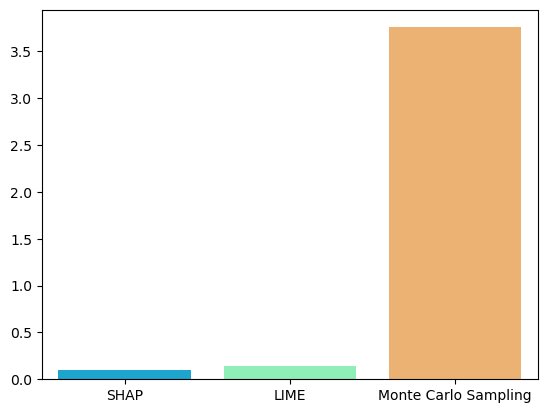

In [69]:

time5 = pd.DataFrame(average_time5, columns=['SHAP', 'LIME', 'Monte Carlo Sampling'])
sns.barplot(time5, palette='rainbow')

# Time experiment for model using 10 features

In [70]:
average_time10= [[0, 0, 0]]

In [71]:
def time_shap10():
    for i in range(0,5):
        explainerX = shap.KernelExplainer(RFR_model10.predict, x_train10.iloc[:100])
        shap_values = explainerX.shap_values(x_test10.iloc[8])
    
start_shap10= timer()

time_shap10()

end_shap10= timer()

average_time10[0][0]=(end_shap10- start_shap10)/5
print((end_shap10- start_shap10)/5)

1.7839321200000087


In [72]:
def time_lime10():
    for i in range(0,5):
        lime_explainer10=lime.lime_tabular.LimeTabularExplainer(x_train10.values[:100],feature_names = x_train10.columns, mode='regression')
        surrogate_model = lime_explainer10.explain_instance(x_train10.iloc[8],RFR_model10.predict, num_features=10)
    
start_lime10= timer()

time_lime10()

end_lime10 = timer()

average_time10[0][1]=(end_lime10- start_lime10)/5
print((end_lime10- start_lime10)/5)

0.13805096000000958


In [73]:
def time_mcs10():
    for i in range(0,5):
        Monte_carlo_sampling(50,  x_test10.iloc[8].values.ravel(), 10, RFR_model10)

    
start_mcs10= timer()
    
time_mcs10()
    
end_mcs10= timer()

average_time10[0][2]= (end_mcs10 - start_mcs10)/5
print((end_mcs10 - start_mcs10)/5)   

7.875065439999981


<AxesSubplot: >

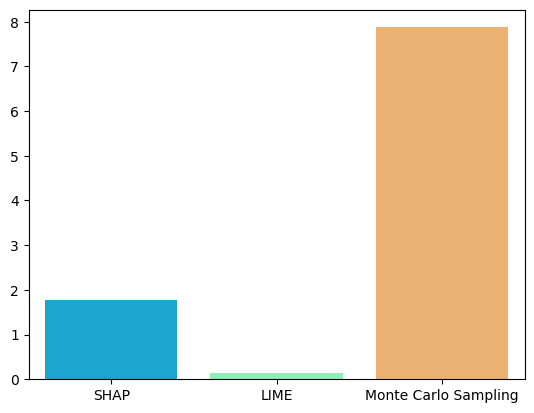

In [74]:

time10 = pd.DataFrame(average_time10, columns=['SHAP', 'LIME', 'Monte Carlo Sampling'])
sns.barplot(time10, palette='rainbow')

# Time experiment for model using 18 features

In [75]:
average_time18= [[0, 0, 0]]

In [76]:
def time_shap18():
    for i in range(0,5):
        explainerX = shap.KernelExplainer(RFR_model.predict, x_train.iloc[:100])
        shap_values = explainerX.shap_values(x_test.iloc[8])
    
start_shap18= timer()

time_shap18()

end_shap18= timer()

average_time18[0][0]=(end_shap18- start_shap18)/5
print((end_shap18- start_shap18)/5)

3.5083232599999974


In [77]:
def time_lime18():
    for i in range(0,5):
        lime_explainer_new=lime.lime_tabular.LimeTabularExplainer(x_train.values[:100],feature_names = x_train.columns, mode='regression')
        surrogate_model = lime_explainer_new.explain_instance(x_train.iloc[8],RFR_model.predict, num_features=18)
    
start_lime18= timer()

time_lime18()

end_lime18 = timer()

average_time18[0][1]=(end_lime18- start_lime18)/5
print((end_lime18- start_lime18)/5)

0.1355967800000144


In [78]:
def time_mcs18():
    for i in range(0,5):
        Monte_carlo_sampling(50,  x_test.iloc[8].values.ravel(), 18, RFR_model)
    
start_mcs18= timer()
    
time_mcs18()
    
end_mcs18= timer()

average_time18[0][2]= (end_mcs18 - start_mcs18)/5
print(( end_mcs18 - start_mcs18)/5)  

13.645233899999994


<AxesSubplot: >

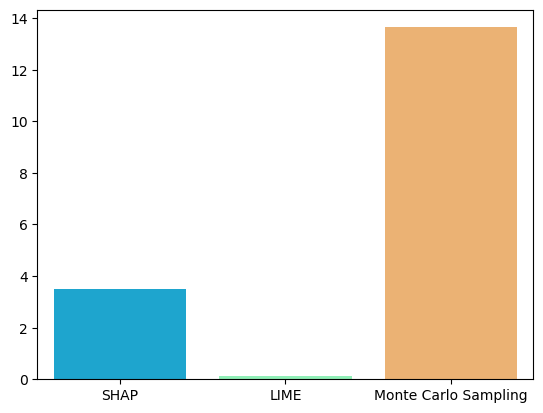

In [79]:
time18 = pd.DataFrame(average_time18, columns=['SHAP', 'LIME', 'Monte Carlo Sampling'])
sns.barplot(time18, palette='rainbow')